<a href="https://colab.research.google.com/github/Gianlucca123/Data-Analysis-from-Airbnb/blob/main/Data_Analysis_from_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **This is the first project of the course Data Science in Practice.**
*for more information about the course, see  [sigmoidal.ai](https://sigmoidal.ai)*

---

# Data Analysis from Airbnb - New York

[Airbnb](https://www.airbnb.com/) is one of the most successful hotel chains in the world. **The funny is it does not have a single hotel!**  Connecting people who want to travel( and want some place to retire) with a host who is willing to lend his place.   Airbnb serves as a bridge for them with its brilliant platform for an easy deal. 

In 2018, **Airbnb has been hosted 300 million people around the world with 10 years of existence**. The startup is a challenge for traditional hotels. 
Airbnb has a site that hosts data from its platform, these data are about the information of homes that the hosts lend their places from a lot of cities. We can download these data and study them to do projects and solutions of Data Science.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, we will analyze the data from New York City and try to find some insights from the raw data.**   

<center><img alt="Analisando Airbnb" width="%" src="https://image.freepik.com/fotos-gratis/estatua-da-liberdade-e-o-horizonte-da-cidade-de-nova-york-eua_268835-777.jpg"></center>

# Obtation of the Data
The data we will analyze is from [Inside Airbnb](http://insideairbnb.com/get-the-data.html). On this site, there are several datasets about many cities around the worlds. 

In [2]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the dataset
df = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-12-10/visualisations/listings.csv")

# Data Analysis

**Arguments of the dataset:**
- host_id : Identification of the Host.
- host-name : Name of the host.
- neighbourhood_group : Group of neighbourhood.
- neighbourhood : Name of the neighbourhood.
- latitude :  latitude coordinate of the place.
- longitude : longitude coordinate of the place.
- room_type : type of the room that the guest will stay.
- price : Price of the lease.
- minimum_nights : The number of nights the guest will stay.
- number_of_reviews : The number of reviews the place has.
- last_reviews : The date of the last review.
- reviews_per_month : The number of reviews per month.
- calculated_host_listings_count : The number of places the same host has.
- availability_365 : how many nights a dwelling is rented per year.

Lets see the first five rows of the dataset:

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0


## How many arguments and inputs does the dataset have? What are the types of these inputs?

In [ ]:
# Dimension of the dataset
rows , columns = df.shape
print("rows/inputs: {}".format(rows))
print("columns/arguments: {}".format(columns))
print()
print(df.dtypes)

rows/inputs: 36923
columns/arguments: 16

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


## What is the percentage of the missing values? 

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.254151
last_review                       0.254151
name                              0.000352
host_name                         0.000244
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Here, we can see that only 4 arguments have missing values. Reviews_per_month and last_review have one quarter of missing values.
Name and host_name almost don't have missing values.
In this project we won't do a deep analizie of the dataset. Furthermore, we will ignore these missing values.  

## What is the distribution of the arguments? 

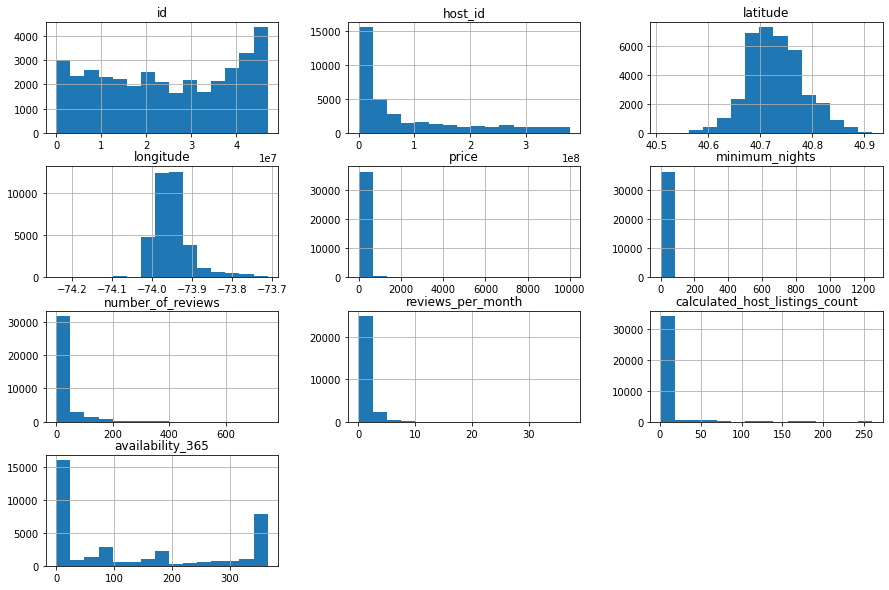

In [ ]:
# Histograns of the argments.
df.hist(bins= 15 , figsize=(15,10));
# ["price" , "minimum_nights" , "number_of_reviews" , "reviews_per_month" , "calculated_host_listings_count"]

## Are there outliers on the dataset ? 
First, let's see the principal statistics information about the dataset.

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.692300e+04,3.692300e+04,36923.000000,36923.000000,36923.000000,36923.000000,36923.000000,27539.000000,36923.000000,36923.000000
mean,2.455477e+07,9.078121e+07,40.729724,-73.951458,145.921187,23.674647,23.182298,0.892762,8.947946,134.103513
std,1.487872e+07,1.072908e+08,0.054451,0.047950,268.388200,26.779132,48.066110,1.305804,31.080929,147.640898
min,2.595000e+03,2.438000e+03,40.508680,-74.239860,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.063646e+07,9.419684e+06,40.690600,-73.983990,61.000000,4.000000,0.000000,0.110000,1.000000,0.000000
50%,2.403313e+07,3.902380e+07,40.725690,-73.956120,100.000000,30.000000,4.000000,0.370000,1.000000,77.000000
75%,3.905638e+07,1.458656e+08,40.762555,-73.934915,159.000000,30.000000,21.000000,1.170000,2.000000,313.000000
max,4.694186e+07,3.791734e+08,40.914720,-73.710870,10000.000000,1250.000000,748.000000,37.280000,260.000000,365.000000


Here, we see something awkward: 
- The max price is 10000 dolars, but 75% of the prices is until 159 dolars.
- The max minimum_nights is 1250, but 75% of the minimum_nights is 30.
- The min of price and minimum_nights are zero.

In fact, there are outliers, that is why the distribuition of price and minimum_night is so strange. Outliers can be a result of a mistake during data colection or it can be just an indication of variance in your data. On our occasion, it is important to remove these outliers so we can analyze better our dataset.

We will use the Inter-Quartile range to detect outliers. In the Inter-Quartile Method, any data point less than the Lower Bound (1) or more than the Upper Bound (2) is considered as an outlier, the interquartile range is the difference between the third and the first quartiles (3).

$ Lower Bound = Q1 - 1.5 \times IQR  (1) $

$ Upper Bound = Q3 + 1.5 \times IQR (2)$

$IQR = Q3 - Q1 (3)$

For more information about the method, see this [article](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097).



In [ ]:
Q1 = df.quantile(0.25) # first quartile
Q3 = df.quantile(0.75) # third quartile
IQR = Q3 - Q1 # Interquartile range
print(IQR)

id                                2.841992e+07
host_id                           1.364459e+08
latitude                          7.195500e-02
longitude                         4.907500e-02
price                             9.800000e+01
minimum_nights                    2.600000e+01
number_of_reviews                 2.100000e+01
reviews_per_month                 1.060000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  3.130000e+02
dtype: float64


Now we will apply the method for price and minimum_nights.

In [ ]:
outliers_price = df[(df["price"] < (Q1["price"] - 1.5 * IQR["price"])) | (df["price"] > (Q3["price"] + 1.5 * IQR["price"])) ]
outliers_price.shape

(2300, 16)

In [ ]:
outliers_night = df[(df["minimum_nights"] < (Q1["minimum_nights"] - 1.5 * IQR["minimum_nights"])) | (df["minimum_nights"] > (Q3["minimum_nights"] + 1.5 * IQR["minimum_nights"])) ]
outliers_night.shape

(477, 16)

As you can see, there are 2300 outliers for price and 477 outliers for minimum_nights.
After that, it is time to remove these outliers. First we will merge the 2 dataframes of outliers and remove the duplicate rows. Then we will remove from the dataset.

In [ ]:
# Merge price and minimum_nights
outliers = pd.concat([outliers_night, outliers_price])
outliers.shape

(2777, 16)

In [ ]:
# Remove duplicate rows 
outliers.drop_duplicates(inplace = True)
outliers.shape

(2731, 16)

In [ ]:
# Copy the original dataframe and remove the outliers
df_clean = df.copy()
df_clean.drop(outliers.index, axis= 0 , inplace = True)
df_clean.shape

(34192, 16)

## The distribution of Price and minimum_night without outliers

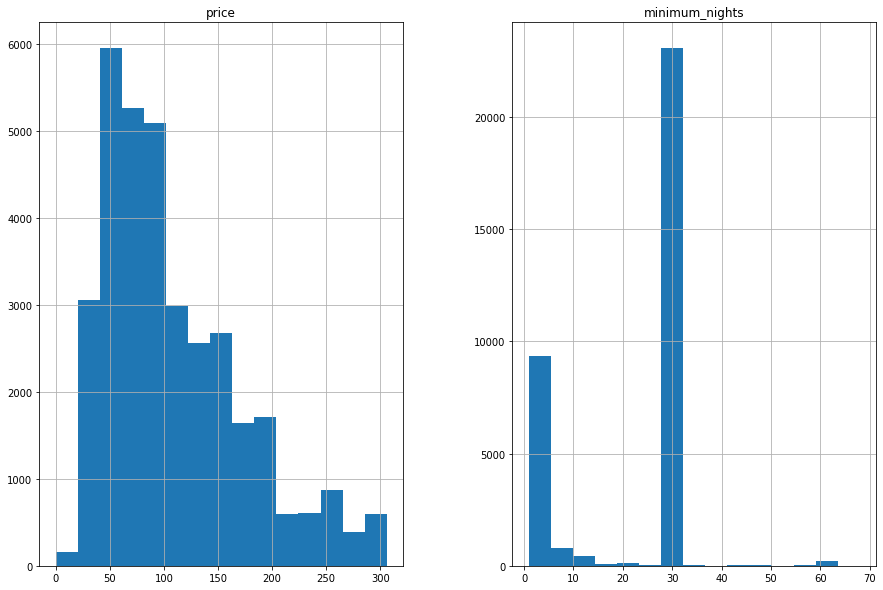

In [ ]:
df_clean[["price" , "minimum_nights"]].hist(bins = 15 , figsize=(15,10));

Now we can see the real price's mean of the lease.

In [ ]:
df_clean["price"].mean()

109.6372250818905

## Correlation between the argments.
Correlation means that one argument is tied with another argument. This correlation can be measured. We will use Matrix of correlation and heatmap to show us what is the correlation between each argument using the library seaborn.

In [ ]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.030063,-0.022277,-0.057180,0.002511,0.019016
minimum_nights,0.030063,1.000000,-0.244348,-0.378572,0.115696,-0.137147
number_of_reviews,-0.022277,-0.244348,1.000000,0.707528,-0.101940,0.157950
reviews_per_month,-0.057180,-0.378572,0.707528,1.000000,-0.061562,0.204524
calculated_host_listings_count,0.002511,0.115696,-0.101940,-0.061562,1.000000,0.196391
availability_365,0.019016,-0.137147,0.157950,0.204524,0.196391,1.000000


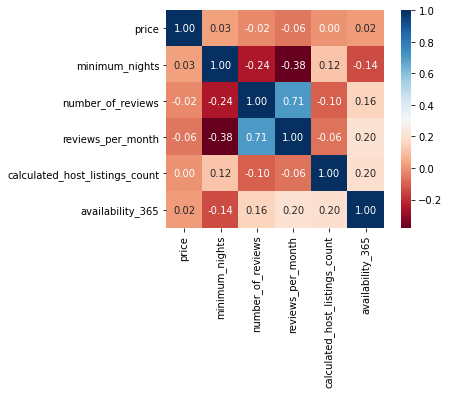

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## The most commom type of building.
Airbnb offers several types of building to rent. Below is the most commom and their percentege.

In [ ]:
df_clean["room_type"].value_counts()

Entire home/apt    17273
Private room       16077
Shared room          636
Hotel room           206
Name: room_type, dtype: int64

In [ ]:
df_clean["room_type"].value_counts() / df_clean.shape[0]

Entire home/apt    0.505177
Private room       0.470198
Shared room        0.018601
Hotel room         0.006025
Name: room_type, dtype: float64

## What is the most expensive neighbourhood ? 

In [ ]:
df_clean.groupby("neighbourhood").price.mean().sort_values(ascending = False)[:10]

neighbourhood
Woodrow              255.000000
Lighthouse Hill      200.000000
Belle Harbor         196.333333
Huguenot             180.000000
Tribeca              178.956140
DUMBO                172.607143
NoHo                 168.512821
Vinegar Hill         162.058824
West Village         161.821632
Greenwich Village    157.330396
Name: price, dtype: float64

There is a tricky here. The code says that neighbourhoods like Woodrow and Lighthouse Hill are the most expensive. But in this [article](https://www.timeout.com/newyork/news/these-are-the-new-most-expensive-neighborhoods-in-nyc-010621) says that others neighbourhoods like Tribeca and NoHo is way more expesive. Why is this happening? The answer is below:

In [ ]:
print(df_clean[df_clean.neighbourhood == "Woodrow"].shape)
print(df_clean[df_clean.neighbourhood == "Lighthouse Hill"].shape)

(1, 16)
(1, 16)


There is only one input for each neighbourhood. Because of that, the mean of the price is high.

To get a better viasualization, we will see the price per night for each district of New York instead of neighbourhoods. 

In [ ]:
df_clean.groupby("neighbourhood_group").price.mean().sort_values(ascending = False)

neighbourhood_group
Manhattan        127.872304
Brooklyn         101.300603
Staten Island     92.030189
Queens            81.737267
Bronx             81.059471
Name: price, dtype: float64

In [ ]:
df.neighbourhood_group.value_counts()

Manhattan        16642
Brooklyn         14439
Queens            4629
Bronx              937
Staten Island      276
Name: neighbourhood_group, dtype: int64

As you can see, we have a more trustful information than before.

Now we will plot a map that shows all the rents and their prices.

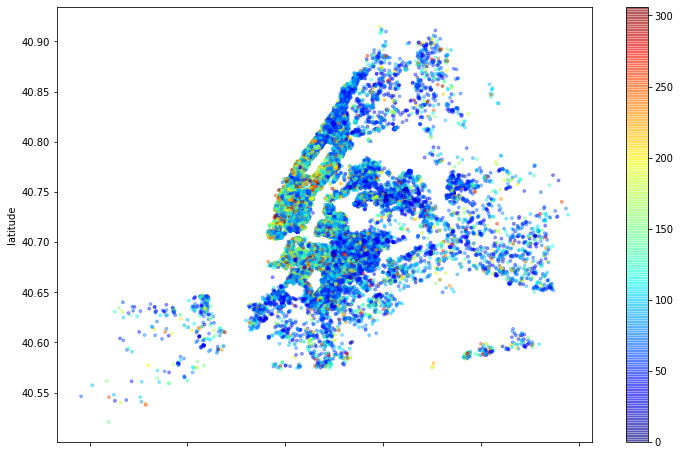

In [ ]:
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Can you see a white rectangle on the map? This rectangle is the Central Park. The colors around the rectangle show us that is an expensive area.

## What is the mean of the minimum nights? 

In [ ]:
df_clean.minimum_nights.mean()

21.789102714085168

If the dataset is correct, this show that people tend to stay a long time in New York.

##WordCloud
Wordcloud shows words that appear more often. For this task, we will use another dataset of New York that has more information.
We will use the library worldcloud.

In [21]:
ny = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-12-10/data/listings.csv.gz") 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #import the libray wordcloud

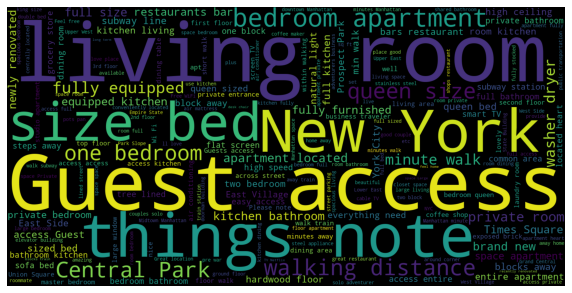

In [28]:
description = ny.dropna(subset=["description"] , axis=0)["description"] #remove missing values in "description"
stopwords = set(STOPWORDS)
#words that don't interest us are removed.
stopwords.update(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now","br"])
all_description = " ".join(s for s in description) #put all the description together and without spaces
wordcloud = WordCloud(stopwords=stopwords , background_color="black" , width=1600, height=800).generate(all_description) # make the wordclouds
# Show the result
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png") #export to image file

Above is the result of our CloudWords.

# Conclusion
This Notebook was a plain analysis of the dataset. But we can see the presence of outliers that can change the analysis, so it is important to detect and take care of this. 

We can see that the dataset is not even for the neighborhood, this can cause someone to get wrong conclusions.

Is important to inform you that this dataset is just a summary. If you want a deeper analysis, there is a more complete dataset about the city in [Inside Airbnb](http://insideairbnb.com/index.html).

# References
- The image of New York was made by [vwalakte](https://br.freepik.com/vwalakte) from [freepik](https://br.freepik.com/)